In [2]:
#standard imports
import numpy as np
import pandas as pd
import math
import scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from os import listdir
%matplotlib inline

#change default plot settings
default_figsize = mpl.rcParamsDefault['figure.figsize']
mpl.rcParams['figure.figsize'] = [1.5*val for val in default_figsize]
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

mpl.rc('font', **font)
mpl.rc('axes', linewidth=3)

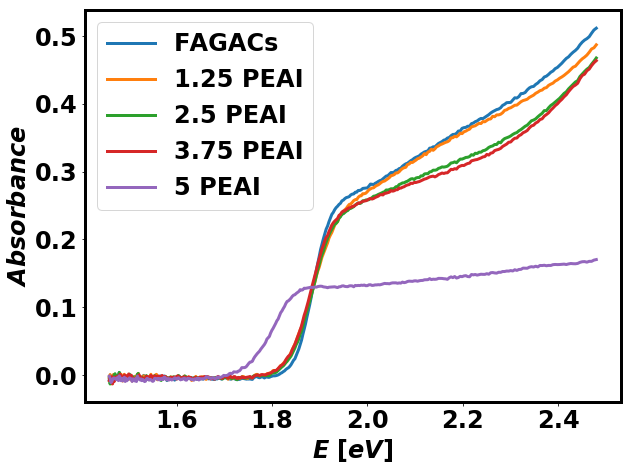

In [3]:
#Specify Directory
directory = '2018_8-7UVvis'

#Get all csv files other than 100%T file
names = []
for file in listdir(directory):
    if file[-3:]=='csv' and not file[:4]=='100%':
        names.append(file)

data = []        
for name in names:
    a = np.loadtxt(directory + '/' + name,delimiter=',',skiprows=2)
    data.append(a)
    plt.plot(1240/a[:,0],a[:,1],linewidth=3)
plt.xlabel('$E\ [eV]$')
plt.ylabel('$Absorbance$')
#plt.ylim(-20,5)
#plt.xlim(0,1.2)
plt.legend(['FAGACs','1.25 PEAI','2.5 PEAI','3.75 PEAI','5 PEAI'])    


[1.8664119416977505, 1.8587675672055985, 1.8609275751944065, 1.858296641344336, 1.778948636438437]


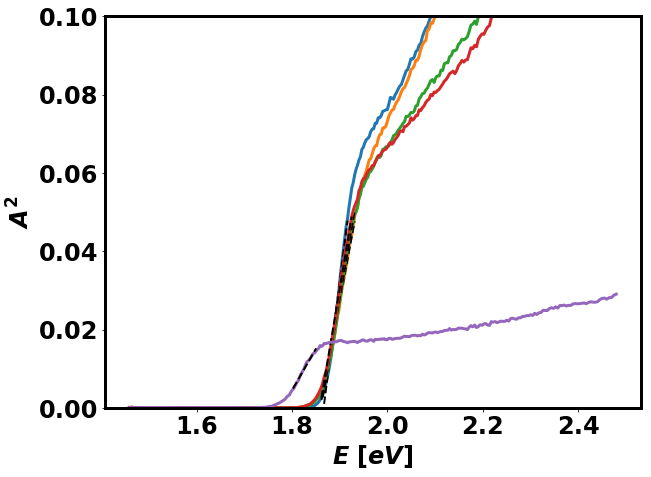

In [4]:
#make Tauc plot
Egs = []
for ii in range(len(names)):
    a = data[ii]
    plt.plot(1240/a[:,0],(a[:,1])**2,linewidth=3)
    
    #choose limits for linear fit
    fit_low = 0.005
    fit_high = 0.05
    if ii == 4:
        fit_high = .015
    low_idx = np.argmin(np.abs(a[:,1]**2-fit_low))
    high_idx = np.argmin(np.abs(a[:,1]**2-fit_high))
    min_idx = min(low_idx,high_idx)
    max_idx = max(low_idx,high_idx)
    #fit and plot fit
    Xs = np.polyfit(1240/a[min_idx:max_idx,0],a[min_idx:max_idx,1]**2,1)
    plt.plot(1240/a[min_idx:max_idx,0],Xs[0]*1240/a[min_idx:max_idx,0]+Xs[1],linestyle='--',linewidth=2,color='0')
    #Calculate Eg
    Eg = -Xs[1]/Xs[0]
    Egs.append(Eg)
plt.xlabel('$E\ [eV]$')
plt.ylabel('$A^2$')
plt.ylim(0,.1)
#plt.xlim(0,1.2)
#plt.legend({'FAGACs','1.25 PEAI','2.5 PEAI','3.75 PEAI','5 PEAI'})    
print(Egs)